In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('zomato_updated.csv')
df = df.dropna()
df

,name,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7 /5,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5 /5,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,Whitefield,Bar,Continental,"1,500",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


In [2]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

### In the cell above, we can see that 'Koramangala', 'Koramangala 1st block', 'Koramangala 2nd Block' etc are treated as separate areas. Hence we would need to make sure that all of them are renamed to 'Koramangala'

In [43]:
areas = df['location'].unique()
koramangala_merged = []
for i in areas:
    if type(i)==str:
        if 'Koramangala' in i:
            koramangala_merged.append(i)
# for i in range(0,len(koramangala_merged)):
#     df['location'] = df['location'].str.replace(str(koramangala_merged[i]),'Koramangala')
for i in koramangala_merged:
    df['location'] = df['location'].str.replace(str(i),'Koramangala')

In [44]:
df['location'].unique()
            

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala', 'Richmond Road', 'HSR',
       'Marathahalli', 'Bellandur', 'Sarjapur Road', 'Whitefield',
       'East Bangalore', 'Old Airport Road', 'Indiranagar', 'Frazer Town',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur', 'Ejipura',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Seshadripuram',
       'Kammanahalli', 'Majestic', 'Langford Town', 'Central Bangalore',
       'Sanjay Nagar', 'Brookefield', 'ITPL Main Road, Whit

### Now we can see that we only have 'Koramangala' in the series. This made the data much more uniform

In [5]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### The data above isn't very clean. We will need to replace 'NEW'  and '-' with 0

In [6]:
anomalies = ['NEW','-']
for i in range(0,len(anomalies)):
    df['rate'] = df['rate'].str.replace(anomalies[i],'0/5')


In [7]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [8]:
# We need to change 3/5, 4/5 to 3,4 etc and convert it to float.
df['rate'] = df['rate'].str.split('/').str.get(0)
df['rate'] = pd.to_numeric(df['rate'])

## Area with best pubs

In [10]:
pubs = df[(df['listed_in(type)'].str.contains('Pubs and bars')) ]

## To find out areas with best pubs, we will need to compare the average ratings of pubs in all areas

In [12]:
areas = pubs['location'].unique()
df

,name,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,Whitefield,Bar,Continental,"1,500",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


In [13]:
avg_rating={}
# Creating an empty dictionary with all unique areas as keys
for area in areas:
        if area not in avg_rating.keys():
            avg_rating[area] = 0
            
for area in areas:
    a = df[(df['location'].str.contains(area)) & (df['listed_in(type)'].str.contains('Pubs and bars'))]
    mean_rating = a['rate'].mean()
    avg_rating[area] += mean_rating

In [14]:
{k: v for k, v in sorted(avg_rating.items(), key=lambda item: item[1], reverse = True)}

{'Marathahalli': 4.533333333333333,
 'Bannerghatta Road': 4.35,
 'Sarjapur Road': 4.328571428571428,
 'Infantry Road': 4.3,
 'Cunningham Road': 4.228571428571429,
 'New BEL Road': 4.2,
 'St. Marks Road': 4.1863636363636365,
 'Church Street': 4.165000000000001,
 'Old Airport Road': 4.144444444444445,
 'Malleshwaram': 4.114285714285716,
 'Sankey Road': 4.1,
 'Lavelle Road': 4.077419354838709,
 'Brigade Road': 4.072727272727272,
 'Rajajinagar': 4.029999999999999,
 'Bellandur': 4.01875,
 'Wilson Garden': 4.0,
 'Whitefield': 3.996875,
 'JP Nagar': 3.983333333333333,
 'MG Road': 3.975,
 'Race Course Road': 3.9166666666666665,
 'Richmond Road': 3.9000000000000004,
 'Langford Town': 3.9,
 'Hosur Road': 3.9,
 'Frazer Town': 3.9,
 'Residency Road': 3.8846153846153846,
 'ITPL Main Road, Whitefield': 3.8499999999999996,
 'Shanti Nagar': 3.8,
 'Banaswadi': 3.8,
 'HSR': 3.783333333333333,
 'Koramangala': 3.77037037037037,
 'Shivajinagar': 3.725,
 'Domlur': 3.7181818181818183,
 'Indiranagar': 3.71060

## Now we will verify if the output above is correct. To do this, we can manually fetch the average pub rating of any area(s) and cross check it with our output

In [49]:
bel = pubs[pubs['location'].str.contains('Bellandur')]
bel['rate'].mean()

4.01875

## Hence we can conclude that our analysis is correct and the best pubs in Bengaluru can be found in Marathahalli.

In [50]:
## Area wise count of pubs      
c = df[df['listed_in(type)'].str.contains('Pubs and bars')]
count_pubs = c['location'].value_counts()
count_pubs

Koramangala                   162
Indiranagar                    66
MG Road                        32
Lavelle Road                   31
Whitefield                     30
Residency Road                 26
Ulsoor                         25
St. Marks Road                 22
Brigade Road                   22
Sarjapur Road                  21
Church Street                  20
Electronic City                20
HSR                            18
BTM                            16
Bellandur                      16
Malleshwaram                   14
Richmond Road                  12
Domlur                         11
Rajajinagar                    10
Seshadripuram                   9
Old Airport Road                9
New BEL Road                    8
Shivajinagar                    8
Cunningham Road                 7
JP Nagar                        6
Race Course Road                6
Infantry Road                   4
Langford Town                   4
Marathahalli                    3
Basaveshwara N

In [19]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',','')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'])

In [20]:
df.corr()

,rate,approx_cost(for two people)
rate,1.000000,0.249954
approx_cost(for two people),0.249954,1.000000


In [21]:
## Most popular cuisines

cuisines = []

c = df['cuisines'].str.split(',')


for i in c:
    for j in i:
        
        cuisines.append(j)

cuisines = np.array(cuisines)
cuisine_words = []
for i in cuisines:
    i = i.strip()
    i = i.replace(" ","")
    cuisine_words.append(i)
cuisine_words = np.array(cuisine_words) 

In [22]:
words = ""
words+= " ".join(cuisine_words)+" "


In [23]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                collocations=False,
                min_font_size = 15).generate(words)

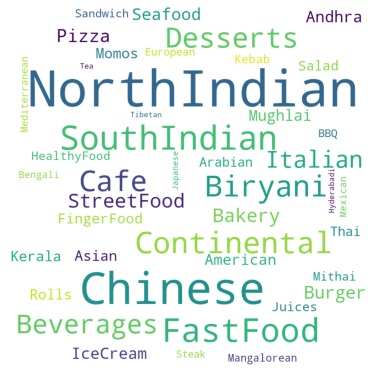

In [24]:
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Finding out what percentage of buffet restaurants have online order facility

In [26]:
buffet = df[df['listed_in(type)'].str.contains('Buffet')]

In [27]:
buffet

,name,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...
48856,Flavors of India,Yes,Yes,3.7,Bellandur,Casual Dining,"Chinese, North Indian, Salad, Fast Food",1500,Buffet
48858,Monsoon,No,No,2.8,Bellandur,Food Court,Continental,1000,Buffet
48859,BISO - Citrus Hotels,No,No,3.0,Bellandur,Casual Dining,"North Indian, Italian, Chinese, Asian",1000,Buffet
48860,Chef's Gallery,No,No,3.5,Bellandur,Casual Dining,"Chinese, Italian, North Indian",700,Buffet


In [28]:
percent_online_orders = df['online_order'].value_counts()

In [29]:
percent_online_orders

Yes    28202
No     15331
Name: online_order, dtype: int64

In [30]:
online_order_available = percent_online_orders[0]
online_order_not_available = percent_online_orders[1]

online_order_percentage = online_order_available*100 / (online_order_not_available + online_order_available)

In [31]:
online_order_percentage

64.7830381549629

## Hence we can conclude that 64.78 percent of the  buffet restaurants provide online order facility

# Average cost of each cuisine

In [34]:
cuisine_average_cost = {}
cuisines = df['listed_in(type)'].unique()

In [35]:
cuisines

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [36]:
for cuisine in cuisines:
    if cuisine not in cuisine_average_cost.keys():
        cuisine_average_cost[cuisine] = 0


In [52]:
for cuisine in cuisine_average_cost.keys():
    avg = df[df['listed_in(type)'].str.contains(cuisine)]
    cuisine_average_cost[cuisine] = avg['approx_cost(for two people)'].mean()

In [53]:
cuisine_average_cost

{'Buffet': 1310.392609699769,
 'Cafes': 639.2699811202014,
 'Delivery': 488.90978762696216,
 'Desserts': 407.5289575289575,
 'Dine-out': 644.2996764626585,
 'Drinks & nightlife': 1451.677539608574,
 'Pubs and bars': 1329.8484848484848}

In [40]:
keys = list(cuisine_average_cost.keys())
vals = list(cuisine_average_cost.values())

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

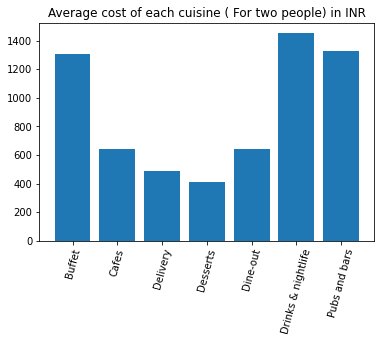

In [41]:
plt.bar(keys,vals)
plt.title('Average cost of each cuisine ( For two people) in INR')
plt.xticks(rotation=75)